<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/M3_MP1_NB_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: Credit Card Default Risk Analysis

## Learning Objectives

At the end of the mini project, you will be able to

* understand the application of machine learning in finacial sector
* use a real world dataset.
* compare between different types of classification methods and their pros and cons.

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing



### Dataset Description

The dataset chosen for this mini project is [default of credit card clients Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) with 30000 instances each having 25 attributes.



In [ ]:
# import the libraries used for machine learning
import numpy as np
import pandas as pd
import scipy.optimize as opt

import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from pandas_profiling import ProfileReport
plt.style.use('ggplot')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve

import os

**Exercise 1**: Load the data show the top few rows of the dataframe.  (1 point)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving default_of_credit_card_clients.csv to default_of_credit_card_clients.csv


In [ ]:
cc_data = pd.read_csv("default_of_credit_card_clients.csv" , sep=",")

In [ ]:
cc_data = cc_data.iloc[1: , :] # Removing first row of the data frame
cc_data = cc_data.iloc[:,1:] # removing ID or the first column

In [ ]:
cc_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

In [ ]:
# YOUR CODE HERE
cc_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


**Exercise 2**: Perform the following

- Exploratory Data Analysis (2 points)
- Preprocessing (1 point)

## Exploratory data analysis

there are total 23 explanatory variables and one response variable. Some variable need to be converted to categories. such as.

* __Gender(X2)__
1 = Male, 2 = Female

* __EDUCATION(X3)__
1 = graduate school; 2 = university; 3 = high school; 4 = others
* __Marital status(X4)__
1 = married; 2 = single; 3 = others
* __Repayment status(X6-X11)__
   -2= no consumption, -1= pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ...,8 = payment delay for eight months,9 = payment delay for nine months and above

   these variables should be converted to categorical variable


In [ ]:
# YOUR CODE HERE   # drop column "ID"
# Look above

#Converting X2 to categorical variable
cc_data_stat = cc_data.copy()
cc_data_stat['X2'] = cc_data_stat['X2'].astype('int')
cc_data_stat['X2'] = np.where(cc_data_stat['X2'] == 1, "Male", "Female")
cc_data_stat['X2'] = cc_data_stat['X2'].astype('category')

#Converting X3 to categorical variable
cc_data_stat['X3'] = cc_data_stat['X3'].astype('int') # converting object to int
cc_data_stat['X3'] = np.where(cc_data_stat['X3'] == 1, "graduate school", 
                              np.where(cc_data_stat['X3'] == 2 , 'university', 
                                       np.where(cc_data_stat['X3'] == 3, 'high school', 'others')
                                       ))
cc_data_stat['X3'] = cc_data_stat['X3'].astype('category')


#Converting X4 to categorical variable
cc_data_stat['X4'] = cc_data_stat['X4'].astype('int')
cc_data_stat['X4'] = np.where(cc_data_stat['X4'] == 1, "married", 
                              np.where(cc_data_stat['X4'] == 2 , 'single', "others"))
cc_data_stat['X4'] = cc_data_stat['X4'].astype('category')


In [ ]:
repayment_mapper = pd.DataFrame({'repayment_code':[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                                 'repayment_status':["no consumption", "pay duly", "pay duly", "payment delay for one month",
                                                     "payment delay for two months", "payment delay for three months", 
                                                     "payment delay for four months", "payment delay for five months", 
                                                     "payment delay for six months", "payment delay for seven months",
                                                     "payment delay for eight months", "payment delay for nine months"]})
for col in ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']:
  cc_data_stat[col] = cc_data_stat[col].astype('int')
  new_col = cc_data_stat.merge(repayment_mapper, right_on = 'repayment_code', left_on = col, how = 'left')['repayment_status']
  cc_data_stat[col] = new_col.astype('category')

#Converting X6 -X11

In [ ]:
cc_data_stat.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,Female,university,married,24,pay duly,payment delay for two months,pay duly,pay duly,pay duly,...,0,0,0,0,689,0,0,0,0,1
2,120000,Female,university,single,26,pay duly,pay duly,pay duly,pay duly,pay duly,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,Female,university,single,34,pay duly,pay duly,pay duly,pay duly,pay duly,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,Female,university,married,37,pay duly,pay duly,pay duly,pay duly,pay duly,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,Male,university,married,57,pay duly,pay duly,pay duly,pay duly,pay duly,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,Male,graduate school,single,37,pay duly,pay duly,pay duly,pay duly,pay duly,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,Male,graduate school,single,29,pay duly,pay duly,pay duly,pay duly,pay duly,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,Female,university,single,23,pay duly,pay duly,payment delay for two months,pay duly,pay duly,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,Female,high school,married,28,no consumption,no consumption,no consumption,no consumption,pay duly,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,Male,high school,single,35,pay duly,pay duly,payment delay for two months,pay duly,pay duly,...,0,13007,13912,0,0,0,13007,1122,0,0


In [ ]:
for col in ['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23', 'Y']:
  cc_data_stat[col] = cc_data_stat[col].astype('int')

In [ ]:
cc_data_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      30000 non-null  int64   
 1   X2      30000 non-null  category
 2   X3      30000 non-null  category
 3   X4      30000 non-null  category
 4   X5      30000 non-null  int64   
 5   X6      29999 non-null  category
 6   X7      29999 non-null  category
 7   X8      29999 non-null  category
 8   X9      29999 non-null  category
 9   X10     29999 non-null  category
 10  X11     29999 non-null  category
 11  X12     30000 non-null  int64   
 12  X13     30000 non-null  int64   
 13  X14     30000 non-null  int64   
 14  X15     30000 non-null  int64   
 15  X16     30000 non-null  int64   
 16  X17     30000 non-null  int64   
 17  X18     30000 non-null  int64   
 18  X19     30000 non-null  int64   
 19  X20     30000 non-null  int64   
 20  X21     30000 non-null  int64   
 21  X22     3000

### Statistics
The detail statistics of the dataset 

In [ ]:
print("STATISTICS OF NUMERIC COLUMNS")
print()
print(cc_data_stat.describe().T)

STATISTICS OF NUMERIC COLUMNS

       count           mean            std       min       25%       50%  \
X1   30000.0  167484.322667  129747.661567   10000.0  50000.00  140000.0   
X5   30000.0      35.485500       9.217904      21.0     28.00      34.0   
X12  30000.0   51223.330900   73635.860576 -165580.0   3558.75   22381.5   
X13  30000.0   49179.075167   71173.768783  -69777.0   2984.75   21200.0   
X14  30000.0   47013.154800   69349.387427 -157264.0   2666.25   20088.5   
X15  30000.0   43262.948967   64332.856134 -170000.0   2326.75   19052.0   
X16  30000.0   40311.400967   60797.155770  -81334.0   1763.00   18104.5   
X17  30000.0   38871.760400   59554.107537 -339603.0   1256.00   17071.0   
X18  30000.0    5663.580500   16563.280354       0.0   1000.00    2100.0   
X19  30000.0    5921.163500   23040.870402       0.0    833.00    2009.0   
X20  30000.0    5225.681500   17606.961470       0.0    390.00    1800.0   
X21  30000.0    4826.076867   15666.159744       0.0    2

In [ ]:
cc_data_stat.X2.value_counts() # male, female counts

Female    18112
Male      11888
Name: X2, dtype: int64

In [ ]:
cc_data_stat.X3.value_counts() #Education categories

university         14030
graduate school    10585
high school         4917
others               468
Name: X3, dtype: int64

In [ ]:
cc_data_stat.X4.value_counts() # Marriage catagories

single     15964
married    13659
others       377
Name: X4, dtype: int64

In [ ]:
cc_data_stat.X6.describe()

count        29999
unique          10
top       pay duly
freq         20423
Name: X6, dtype: object

# Visualization

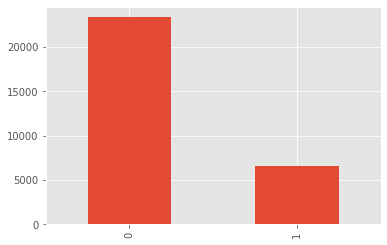

In [ ]:
from IPython.core.pylabtools import figsize
# plot the frequency of defaults
cc_data_stat['Y'].value_counts().plot(kind='bar')

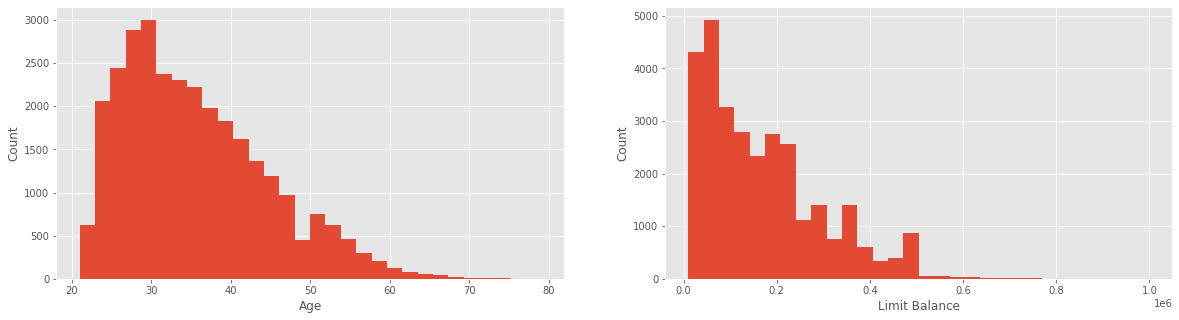

In [ ]:
# Plot distribution of age and limit balance
plt.subplots(figsize=(20,5))
plt.subplot(121)
cc_data_stat['X5'].hist(bins = 30)
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(122)
cc_data_stat['X1'].hist(bins = 30)
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.show()

Text(0.5, 23.80000000000001, 'Marriage')

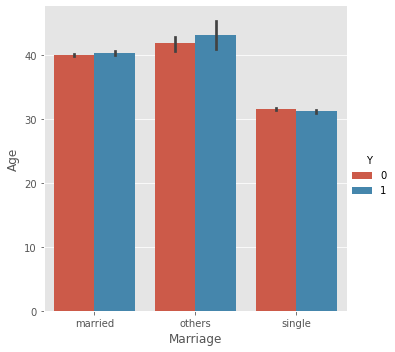

In [ ]:
#Plot the defaulter(Y), marriage(X4) vs age(X5) use seborn library
# sns.scatterplot(hue = 'Y', x = 'X5', y = 'X4', data = cc_data_stat)
sns.catplot(x="X4", y="X5", hue="Y", kind="bar", data=cc_data_stat)
plt.ylabel('Age')
plt.xlabel('Marriage')

Text(0.5, 23.80000000000001, 'Sex')

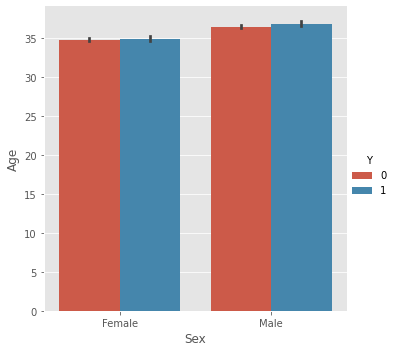

In [ ]:
# plot the defaulter(Y), sex(X2) vs age(X5)
sns.catplot(x="X2", y="X5", hue="Y", kind="bar", data=cc_data_stat)
plt.ylabel('Age')
plt.xlabel('Sex')

# Preprocessing

In [ ]:
{'X3': 'EDU'}.items()

dict_items([('X3', 'EDU')])

In [ ]:
# write a function for onehot_encode
def onehot_encode(df, column_dict):
    df = df.copy()
    for col, value in column_dict.items():
      for condition in df[col].unique():
        df[value +'_' + str(condition)] = np.where(df[col] == condition, 1, 0)
      del df[col]
    return df

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    

    
    df = onehot_encode(
        df,
        {
             'X2': 'SEX',
              'X3':'EDU',
              'X4':'MAR',
              'X6':'PAY_0',
            'X7':'PAY_2', 
            'X8':'PAY_3', 
            'X9':'PAY_4',
            'X10':'PAY_5', 
            'X11':'PAY_6'
        }
    )
    
    # Split df into X and y
    y = df['Y'].copy()
    X = df.drop('Y', axis=1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    # scaler.fit(X)
    X_scaled = scaler.fit_transform(X)
    X = pd.DataFrame(X_scaled, columns = X.columns)
    
    return X, y

In [ ]:
cc_data_ml = cc_data.copy()
X, y = preprocess_inputs(cc_data_ml)

In [ ]:
X

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,...,PAY_6_-2,PAY_6_2,PAY_6_0,PAY_6_-1,PAY_6_3,PAY_6_6,PAY_6_4,PAY_6_7,PAY_6_8,PAY_6_5
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,2.264664,-0.318691,-1.089746,-0.486419,-0.078557,-0.025174,-0.040448,-0.039188,-0.008165,-0.020821
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,-0.441567,3.137832,-1.089746,-0.486419,-0.078557,-0.025174,-0.040448,-0.039188,-0.008165,-0.020821
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,-0.441567,-0.318691,0.917645,-0.486419,-0.078557,-0.025174,-0.040448,-0.039188,-0.008165,-0.020821
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,-0.441567,-0.318691,0.917645,-0.486419,-0.078557,-0.025174,-0.040448,-0.039188,-0.008165,-0.020821
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,-0.441567,-0.318691,0.917645,-0.486419,-0.078557,-0.025174,-0.040448,-0.039188,-0.008165,-0.020821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,...,-0.441567,-0.318691,0.917645,-0.486419,-0.078557,-0.025174,-0.040448,-0.039188,-0.008165,-0.020821
29996,-0.134759,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,...,-0.441567,-0.318691,0.917645,-0.486419,-0.078557,-0.025174,-0.040448,-0.039188,-0.008165,-0.020821
29997,-1.059646,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,...,-0.441567,-0.318691,0.917645,-0.486419,-0.078557,-0.025174,-0.040448,-0.039188,-0.008165,-0.020821
29998,-0.674276,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,...,-0.441567,-0.318691,-1.089746,2.055841,-0.078557,-0.025174,-0.040448,-0.039188,-0.008165,-0.020821


In [ ]:
y

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: Y, Length: 30000, dtype: object

In [ ]:
{column: len(X[column].unique()) for column in X.columns}

{'EDU_0': 2,
 'EDU_1': 2,
 'EDU_2': 2,
 'EDU_3': 2,
 'EDU_4': 2,
 'EDU_5': 2,
 'EDU_6': 2,
 'MAR_0': 2,
 'MAR_1': 2,
 'MAR_2': 2,
 'MAR_3': 2,
 'PAY_0_-1': 2,
 'PAY_0_-2': 2,
 'PAY_0_0': 2,
 'PAY_0_1': 2,
 'PAY_0_2': 2,
 'PAY_0_3': 2,
 'PAY_0_4': 2,
 'PAY_0_5': 2,
 'PAY_0_6': 2,
 'PAY_0_7': 2,
 'PAY_0_8': 2,
 'PAY_2_-1': 2,
 'PAY_2_-2': 2,
 'PAY_2_0': 2,
 'PAY_2_1': 2,
 'PAY_2_2': 2,
 'PAY_2_3': 2,
 'PAY_2_4': 2,
 'PAY_2_5': 2,
 'PAY_2_6': 2,
 'PAY_2_7': 2,
 'PAY_2_8': 2,
 'PAY_3_-1': 2,
 'PAY_3_-2': 2,
 'PAY_3_0': 2,
 'PAY_3_1': 2,
 'PAY_3_2': 2,
 'PAY_3_3': 2,
 'PAY_3_4': 2,
 'PAY_3_5': 2,
 'PAY_3_6': 2,
 'PAY_3_7': 2,
 'PAY_3_8': 2,
 'PAY_4_-1': 2,
 'PAY_4_-2': 2,
 'PAY_4_0': 2,
 'PAY_4_1': 2,
 'PAY_4_2': 2,
 'PAY_4_3': 2,
 'PAY_4_4': 2,
 'PAY_4_5': 2,
 'PAY_4_6': 2,
 'PAY_4_7': 2,
 'PAY_4_8': 2,
 'PAY_5_-1': 2,
 'PAY_5_-2': 2,
 'PAY_5_0': 2,
 'PAY_5_2': 2,
 'PAY_5_3': 2,
 'PAY_5_4': 2,
 'PAY_5_5': 2,
 'PAY_5_6': 2,
 'PAY_5_7': 2,
 'PAY_5_8': 2,
 'PAY_6_-1': 2,
 'PAY_6_-2': 2,
 'PAY

**Exercise 3** (4 Points)

Train the model using the 4 ML models:

- Logistic Regression
- Perceptron
- SVM
- Random Forest

## Training

Application of machine learning models, such as

### Logistic Regression
Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, more popularly called the sigmoid function was to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. 

It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$\frac{1}{ (1 + e^{-value})}$

Where $e$ is the base of the natural logarithms and value is the actual numerical value that you want to transform. Below is a plot of the numbers between $-5$ and $5$ transformed into the range $0$ and $1$ using the logistic function.





### The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (shown in the figure below) called a **threshold logic unit (TLU)**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1004.png" width= 400px/>
</center>

$\hspace{10cm} \text {Threshold logic unit}$
<br><br>
The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{ 
  \begin{aligned}
    &0&  if\ \  z < 0\\ 
    &1&  if\ \  z \ge 0\\ 
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{ 
  \begin{aligned}
    &-1&  if\ \  z < 0\\ 
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\ 
  \end{aligned}
  \right.
\end{equation}
$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class. 



The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.

### Support Vector Machines: Maximizing the Margin

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

### Random Forests

A random forest is a collection of decision trees whose results are aggregated into one final result. Random Forest  is a supervised classification algorithm. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. But here creating the forest is not the same as constructing the decision tree with the information gain or gain index approach.

The difference between the Random Forest algorithm and the decision tree algorithm is that in Random Forest, the process of finding the root node and splitting the feature nodes will run randomly.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [ ]:
log_model = LogisticRegression(random_state=123).fit(X_train, y_train)
linear_predict = log_model.predict(X_test)

svc_model = SVC(random_state=123).fit(X_train, y_train)
svc_predict = svc_model.predict(X_test)

mlp_model = MLPClassifier(random_state=123).fit(X_train, y_train)
mlp_predict = mlp_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=123).fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**Exercise 4**

Evaluate the models and display the results ( 2 points)

### Model Evaluation 

To evaluate the performance of a classification model, the following metrics are used:

* Confusion matrix
  * Accuracy
  * Precision
  * Recall
  * F1-Score

In [ ]:
# Logistic regression metrics
print(classification_report(linear_predict, y_test))
print(confusion_matrix(linear_predict, y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7936
           1       0.36      0.66      0.46      1064

    accuracy                           0.82      9000
   macro avg       0.65      0.75      0.68      9000
weighted avg       0.88      0.82      0.84      9000

[[6686 1250]
 [ 366  698]]


In [ ]:
# SVC regression metrics
print(classification_report(svc_predict, y_test))
print(confusion_matrix(svc_predict, y_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7940
           1       0.36      0.66      0.47      1060

    accuracy                           0.82      9000
   macro avg       0.65      0.75      0.68      9000
weighted avg       0.88      0.82      0.84      9000

[[6693 1247]
 [ 359  701]]


In [ ]:

# MLP regression metrics
print(classification_report(mlp_predict, y_test))
print(confusion_matrix(mlp_predict, y_test))


              precision    recall  f1-score   support

           0       0.92      0.84      0.88      7710
           1       0.37      0.56      0.44      1290

    accuracy                           0.80      9000
   macro avg       0.64      0.70      0.66      9000
weighted avg       0.84      0.80      0.82      9000

[[6480 1230]
 [ 572  718]]


In [ ]:
# Random Forest regression metrics
print(classification_report(rf_predict, y_test))
print(confusion_matrix(rf_predict, y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7828
           1       0.38      0.62      0.47      1172

    accuracy                           0.82      9000
   macro avg       0.66      0.73      0.68      9000
weighted avg       0.86      0.82      0.83      9000

[[6612 1216]
 [ 440  732]]
